In [13]:
# video link
# https://drive.google.com/file/d/1plL4whRaykE4tR2gPSsBdObBVV3rcXZf/view?usp=sharing

In [14]:
import pandas as pd
import numpy as np

import re

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.svm import LinearSVC

import nltk
from nltk.corpus import stopwords

import string
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# loading hte dataset
df = pd.read_csv('/content/data_news.csv')
df.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [16]:
# removing empty records
df = df.dropna(axis=0)

In [17]:
# combining all text columns into one
df['text'] = df['keywords'] + ' ' +df['headline'] + ' ' + df['short_description']

df['text'] = df['text'].astype(str)
df['category'] = df['category'].astype(str)

<ipython-input-17-67877f10b095>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['keywords'] + ' ' +df['headline'] + ' ' + df['short_description']
<ipython-input-17-67877f10b095>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].astype(str)
<ipython-input-17-67877f10b095>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [18]:
# data cleaning and processign

stopWords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # removes html tags
    text = re.sub(r'<.*?>', '', text)

    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = text.split()
    tokens = [word for word in tokens if  word not in stopWords]

    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    tokens = ' '.join(tokens)

    return tokens

df['cleaned_text'] = df['text'].apply(clean_text)

df[['text','cleaned_text']]

,text,cleaned_text
0,running-lessons 143 Miles in 35 Days: Lessons ...,runninglessons 143 mile 35 day lesson learned ...
1,talking-to-yourself-crazy Talking to Yourself:...,talkingtoyourselfcrazy talking crazy crazy hel...
2,crenezumab-alzheimers-disease-drug Crenezumab:...,crenezumabalzheimersdiseasedrug crenezumab tri...
3,"meaningful-life Oh, What a Difference She Made...",meaningfullife oh difference made want busy ke...
4,"green-superfoods Green Superfoods First, the b...",greensuperfoods green superfoods first bad new...
...,...,...
49993,norovirus-outbreak-at-winter-olympics-prompts-...,norovirusoutbreakatwinterolympicspromptsamilit...
49995,san-jose-giants-japanese-heritage-night This B...,sanjosegiantsjapaneseheritagenight baseball te...
49996,dab-kid-san-antonio-spurs Some Young Spurs Fan...,dabkidsanantoniospurs young spur fan dabbed 38...
49997,rasheed-wallace-ejected-knicks-suns-ball-dont-...,rasheedwallaceejectedknickssunsballdontlie ras...


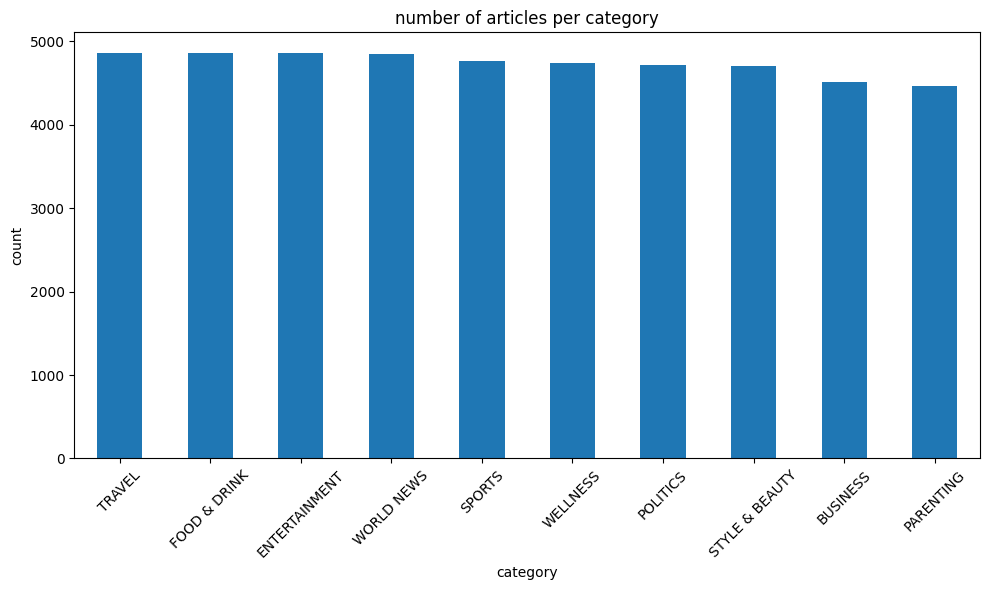

In [19]:
#category distribution

plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')

plt.title('category distribution')
plt.title('number of articles per category')

plt.xlabel('category')

plt.ylabel('count')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [20]:
# feature extraction

tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, min_df=5)


X = tfidf.fit_transform(df['cleaned_text'])
print(X)

X = X.toarray()
print(X)

y = df['category']


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 784767 stored elements and shape (47332, 10000)>
  Coords	Values
  (0, 5668)	0.14365729801905538
  (0, 116)	0.1658679240020859
  (0, 2267)	0.16329310528253155
  (0, 5099)	0.12751852940134828
  (0, 5049)	0.13323438090328588
  (0, 6445)	0.1074692106707809
  (0, 9134)	0.29103942655713844
  (0, 4630)	0.2442660747690986
  (0, 1905)	0.3233627476907274
  (0, 8227)	0.15270038745523948
  (0, 438)	0.1239543321420199
  (0, 4896)	0.13758301482290558
  (0, 4370)	0.33632326572887256
  (0, 1284)	0.3158529786862612
  (0, 7629)	0.13627491530297434
  (0, 8470)	0.18608259874894692
  (0, 4028)	0.11861117123579909
  (0, 9836)	0.15067017635293392
  (0, 8958)	0.11222698799532864
  (0, 3417)	0.12161982614668182
  (0, 9658)	0.09212678637252669
  (0, 5289)	0.1156523652257874
  (0, 2138)	0.1689144048923308
  (0, 6660)	0.15212756560884144
  (0, 8885)	0.1628856001978139
  :	:
  (47329, 120)	0.34653770510595205
  (47329, 6725)	0.28631374376117696
  (4733

In [21]:
#splitin the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

--- LogisticRegression ---
accuracy: 0.8163092848843351
precision: 0.817225583855853
recall: 0.8163092848843351
f1 score: 0.816550059427474
report:
                 precision    recall  f1-score   support

      BUSINESS       0.80      0.78      0.79       901
 ENTERTAINMENT       0.80      0.80      0.80       956
  FOOD & DRINK       0.87      0.88      0.87       967
     PARENTING       0.79      0.78      0.79       899
      POLITICS       0.77      0.75      0.76       906
        SPORTS       0.90      0.89      0.90       989
STYLE & BEAUTY       0.90      0.86      0.88       953
        TRAVEL       0.79      0.79      0.79       974
      WELLNESS       0.74      0.80      0.77       944
    WORLD NEWS       0.82      0.81      0.81       978

      accuracy                           0.82      9467
     macro avg       0.82      0.82      0.82      9467
  weighted avg       0.82      0.82      0.82      9467

confusion matrix: 
 [[706   8  12  18  48  10   6  26  45  22]
 

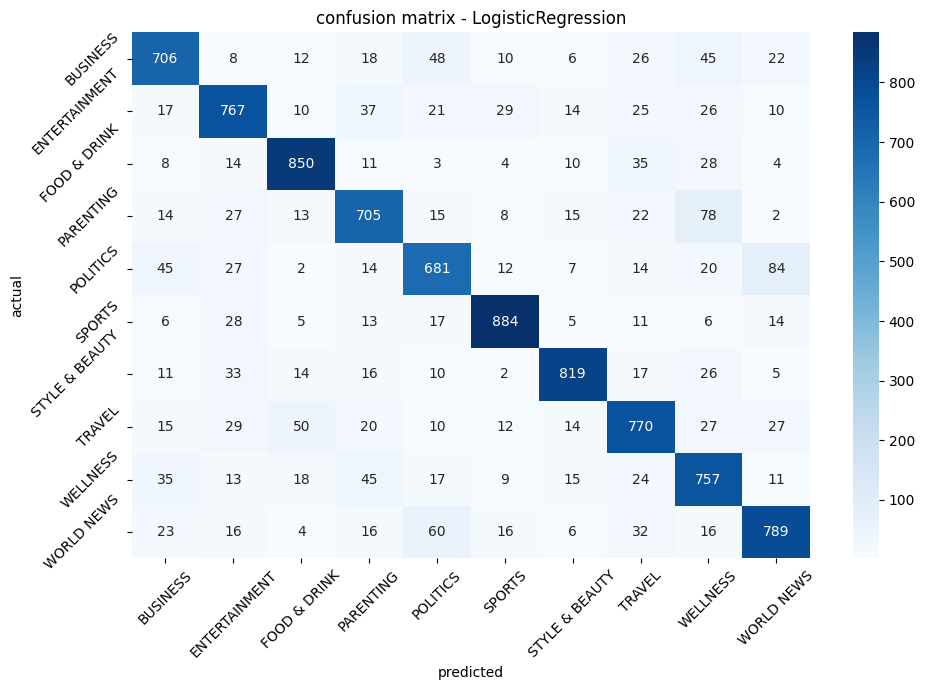

In [22]:
# LogisticRegressionn
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

y_pred_LR = lr.predict(X_test)

print("--- LogisticRegression ---")

print("accuracy:", accuracy_score(y_test, y_pred_LR))
print("precision:", precision_score(y_test, y_pred_LR, average='weighted', zero_division=0))
print("recall:", recall_score(y_test, y_pred_LR, average='weighted', zero_division=0))
print("f1 score:", f1_score(y_test, y_pred_LR, average='weighted', zero_division=0))

print("report:\n", classification_report(y_test, y_pred_LR, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_LR, labels=np.unique(y))
print(f"confusion matrix: \n {cm}")

plt.figure(figsize=(10, 7))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'confusion matrix - LogisticRegression')

plt.xlabel('predicted')
plt.ylabel('actual')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

--- naive bayes ---
accuracy: 0.8025773740361255
precision: 0.80599239191142
recall: 0.8025773740361255
f1 score: 0.8032511411590265
report:
                 precision    recall  f1-score   support

      BUSINESS       0.80      0.73      0.77       901
 ENTERTAINMENT       0.82      0.78      0.80       956
  FOOD & DRINK       0.84      0.88      0.86       967
     PARENTING       0.70      0.77      0.73       899
      POLITICS       0.80      0.75      0.78       906
        SPORTS       0.91      0.86      0.88       989
STYLE & BEAUTY       0.90      0.81      0.85       953
        TRAVEL       0.75      0.80      0.78       974
      WELLNESS       0.73      0.80      0.76       944
    WORLD NEWS       0.79      0.83      0.81       978

      accuracy                           0.80      9467
     macro avg       0.80      0.80      0.80      9467
  weighted avg       0.81      0.80      0.80      9467

confusion matrix: 
 [[661  15  13  30  41  13   5  35  61  27]
 [ 13 74

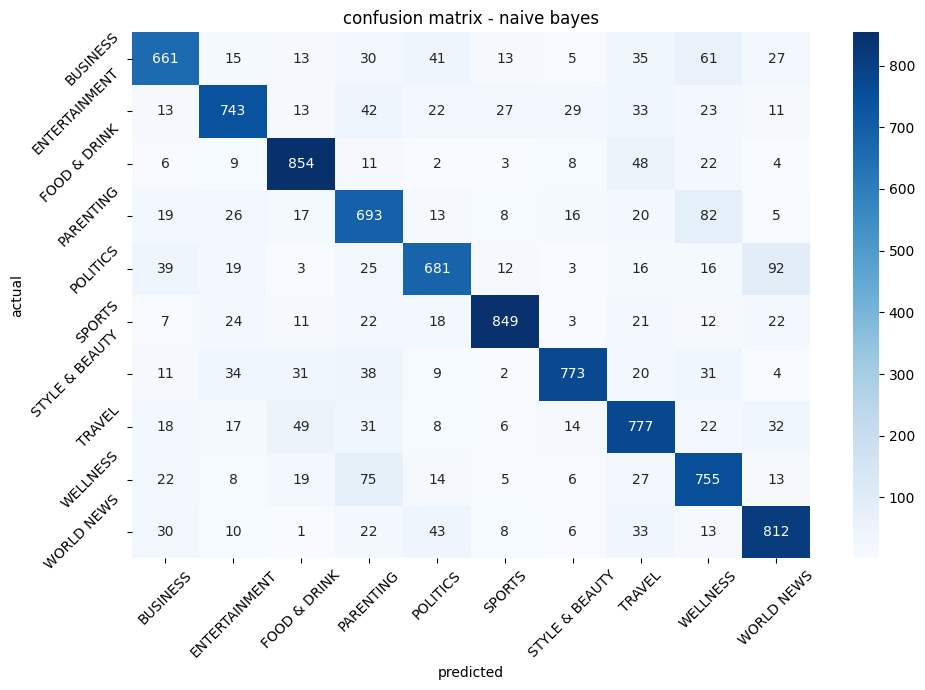

In [23]:
# MultinomialNB - it is used for word classification
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_NB = nb.predict(X_test)

print("--- naive bayes ---")

print("accuracy:", accuracy_score(y_test, y_pred_NB))
print("precision:", precision_score(y_test, y_pred_NB, average='weighted', zero_division=0))
print("recall:", recall_score(y_test, y_pred_NB, average='weighted', zero_division=0))
print("f1 score:", f1_score(y_test, y_pred_NB, average='weighted', zero_division=0))

print("report:\n", classification_report(y_test, y_pred_NB, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_NB, labels=np.unique(y))
print(f"confusion matrix: \n {cm}")

plt.figure(figsize=(10, 7))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'confusion matrix - naive bayes')

plt.xlabel('predicted')
plt.ylabel('actual')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

--- LinearSVC ---
accuracy: 0.8155698743002007
precision: 0.8156090760570802
recall: 0.8155698743002007
f1 score: 0.8153909932571692
report:
                 precision    recall  f1-score   support

      BUSINESS       0.80      0.83      0.82       901
 ENTERTAINMENT       0.81      0.79      0.80       956
  FOOD & DRINK       0.85      0.86      0.86       967
     PARENTING       0.77      0.78      0.77       899
      POLITICS       0.79      0.76      0.77       906
        SPORTS       0.89      0.93      0.91       989
STYLE & BEAUTY       0.89      0.85      0.87       953
        TRAVEL       0.79      0.77      0.78       974
      WELLNESS       0.76      0.78      0.77       944
    WORLD NEWS       0.80      0.80      0.80       978

      accuracy                           0.82      9467
     macro avg       0.81      0.81      0.81      9467
  weighted avg       0.82      0.82      0.82      9467

confusion matrix: 
 [[750  10   7  18  35   6   6  24  29  16]
 [ 15 75

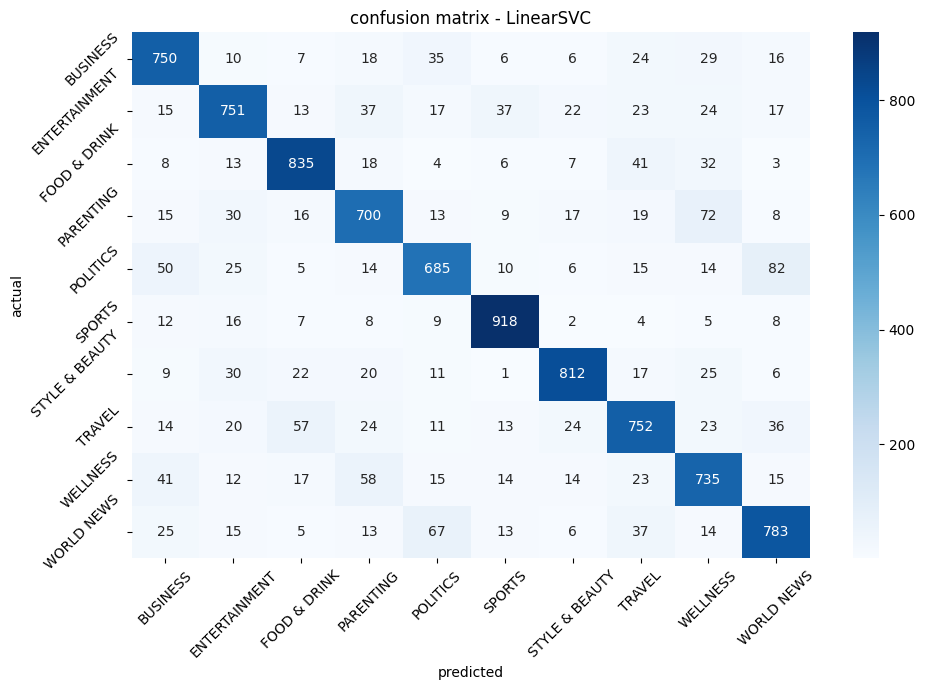

In [24]:
# LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)

y_pred_SVC = svc.predict(X_test)

print("--- LinearSVC ---")

print("accuracy:", accuracy_score(y_test, y_pred_SVC))
print("precision:", precision_score(y_test, y_pred_SVC, average='weighted', zero_division=0))
print("recall:", recall_score(y_test, y_pred_SVC, average='weighted', zero_division=0))
print("f1 score:", f1_score(y_test, y_pred_SVC, average='weighted', zero_division=0))

print("report:\n", classification_report(y_test, y_pred_SVC, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_SVC, labels=np.unique(y))
print(f"confusion matrix: \n {cm}")

plt.figure(figsize=(10, 7))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'confusion matrix - LinearSVC')

plt.xlabel('predicted')
plt.ylabel('actual')

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()
